In [8]:
p_even_tail_count =  1 / 8
p_odd_tail_count = 1 - p_even_tail_count
for i in range(3, 235):
    p_tail = 1 / (i ** 3 + 7)
    p_no_tail = 1 - p_tail
    p_odd_tail_count = p_odd_tail_count * p_no_tail + p_even_tail_count * p_tail
    p_even_head_count = p_odd_tail_count
    p_odd_head_count = 1 - p_even_head_count
    p_even_tail_count = 1 - p_odd_tail_count
    print(i, p_even_tail_count, p_odd_head_count)

3 0.1470588235294118 0.1470588235294118
4 0.1570008285004142 0.1570008285004142
5 0.1621977856443474 0.1621977856443474
6 0.16522740191659546 0.16522740191659546
7 0.1671403881913579 0.1671403881913579
8 0.16842308419062058 0.16842308419062058
9 0.16932410841836343 0.16932410841836343
10 0.16998086292001524 0.16998086292001524
11 0.17047416506811697 0.17047416506811697
12 0.17085402193835542 0.17085402193835542
13 0.17115270249920989 0.17115270249920989
14 0.17139177723385246 0.17139177723385246
15 0.1715861049823837 0.1715861049823837
16 0.17174618974719846 0.17174618974719846
17 0.1718796262554313 0.1718796262554313
18 0.17199201549117193 0.17199201549117193
19 0.17208756107360978 0.17208756107360978
20 0.17216946751520512 0.17216946751520512
21 0.172240212127308 0.172240212127308
22 0.1723017343774953 0.1723017343774953
23 0.17235557013659208 0.17235557013659208
24 0.1724029484071239 0.1724029484071239
25 0.17244486205241472 0.17244486205241472
26 0.1724821202151796 0.17248212021517

75 0.8484848484848484


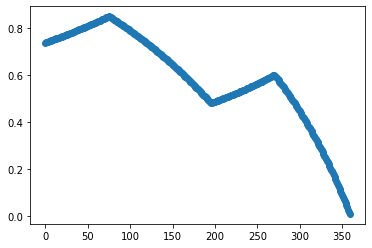

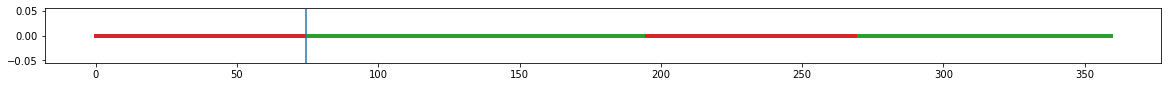

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


yandex_data =  [0] * 75 + [1] * 105 + \
    [1] * 15  + [0] * 30 + \
     [0] * 45  + [1] * 90

# args: binary list (0-1 values) and threshold
def precision(data, threshold):
    # positive: data[threshold:] 
    # negative: data[:threshold]
    TP = sum(data[threshold:]) 
    FP = len(data[threshold:]) - TP
    if TP == 0 and FP == 0:
        return 0
    return TP / (TP + FP)

def recall(data, threshold):
    TP = sum(data[threshold:])
    FN = sum(data[:threshold])
    if TP == 0 and FN == 0:
        return 0
    return TP / (TP + FN)

def f_score(data, threshold):
    # print(threshold)
    _precision = precision(data, threshold)
    _recall = recall(data, threshold)
    if _precision == 0 and _recall == 0:
        return 0
    return 2 * _precision * _recall / (_precision + _recall)



X = []
y = []
for t in range(360):
    X.append(t)
    y.append(f_score(yandex_data, t))
    #print(t, f_score(yandex_data, t))
print(y.index(max(y)), max(y))
threshold = y.index(max(y))

plt.scatter(X, y)

fig = plt.figure(figsize=(20, 1))
plt.scatter(range(360), [0] * 360, marker='s',
           c=['tab:green' if res == 1 else 'tab:red' for res in yandex_data], s=10)
plt.scatter([threshold - 0.5], [0], marker='|', s=3000)